# PLOTS
## DATA EXPLORATION

In [34]:
import numpy as np
import glob
import cv2

import constants as c

total_res = np.array([0,0,0])
other_res = []
for img in glob.glob(f'/home/ritzo/Documents/Bachelor/mahdabschaltung/dev/clean/data/sequences_rois_sorted/*/other/*.jpg'):
    img_shape = cv2.imread(img).shape
    other_res.append(img_shape)
    total_res +=img_shape
    
print("Average resolution: ", total_res/len(glob.glob(f'/home/ritzo/Documents/Bachelor/mahdabschaltung/dev/clean/data/sequences_rois_sorted/*/other/*.jpg')))

Average resolution:  [111.72582142 104.83348803   3.        ]


In [4]:
total_res = np.array([0,0,0])
agr_res = []
for img in glob.glob(f'/home/ritzo/Documents/Bachelor/mahdabschaltung/dev/clean/data/sequences_rois_sorted/*/agriculture/*.jpg'):
    img_shape = cv2.imread(img).shape
    agr_res.append(img_shape)
    total_res +=img_shape
    
print("Average resolution: ", total_res/len(glob.glob(f'/home/ritzo/Documents/Bachelor/mahdabschaltung/dev/clean/data/sequences_rois_sorted/*/agriculture/*.jpg')))

Average resolution:  [120.23414634 128.27456446   3.        ]


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

sqrt_agr = [math.sqrt(x*y) for x,y,_ in agr_res]
sqrt_other = [math.sqrt(x*y) for x,y,_ in other_res]

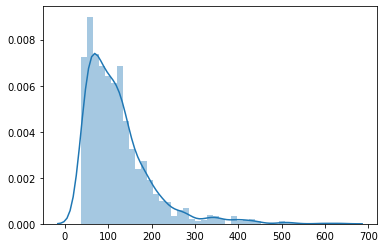

In [38]:
sns.distplot(sqrt_agr)

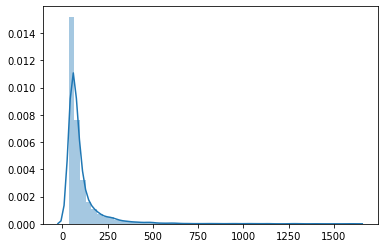

In [37]:
sns.distplot(sqrt_other)

## LR EXPLORATION

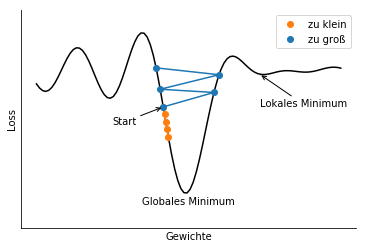

In [67]:
import numpy
import matplotlib.pyplot as plt

# objective function
rsinc = lambda x: (-1 * numpy.sin(x)/x) + numpy.sin(x)/10

# plot the function
x = numpy.linspace(-15,15,100)
y = rsinc(x)

x_small = numpy.linspace(-2.5, -2.0, 5)
x_big_new = [-2.5, 2.5, -2.8, 3, -3.2]

plt.plot(x,y, 'k')
plt.plot(x_small,rsinc(x_small),'C1o', label="zu klein")
plt.plot(x_small,rsinc(x_small), 'C1')

plt.plot(x_big_new,rsinc(x_big_new),'C0o', label="zu groß")
plt.plot(x_big_new,rsinc(x_big_new),'C0')

plt.annotate("Start", xy=(-2.5,rsinc(-2.5)),
             xytext=(-7.5,rsinc(-2.2)),
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0")
            )

plt.annotate("Globales Minimum", xy=(-4.6,-1.11),

            )

plt.annotate("Lokales Minimum", xy=(7,rsinc(7)),
             xytext=(7, -0.3),
             arrowprops=dict(arrowstyle="->",connectionstyle="arc3")
            )

"""
plt.annotate("", xy=(-3.5,rsinc(-3.5)),
             xytext=(8,rsinc(8)),
             arrowprops=dict(color='C3', arrowstyle="-",connectionstyle="arc3,rad=0.4")
            )
"""


cur_axes = plt.gca()

cur_axes.spines['top'].set_visible(False)
cur_axes.spines['right'].set_visible(False)
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([1])

plt.ylim([-1.3, 0.5])
plt.xlabel('Gewichte')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../visuals/lr_big_small.png', dpi=300)

## ROC CURVE

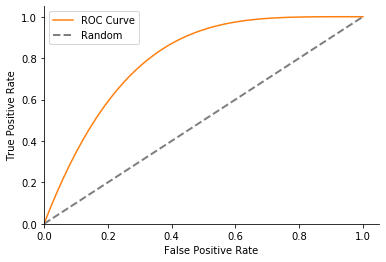

In [6]:
import numpy as np
import matplotlib.pyplot as plt

op = lambda x: 1-x**4

x = np.linspace(0,1,50)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])

plt.plot(np.flip(x), op(x), color="C1", label="ROC Curve")
# plt.fill_between(np.flip(x), sigm(x), alpha=0.3, color="C1", label="AUC")
plt.plot([0, 1], [0, 1], lw=2, linestyle='--', label='Random', color="C7")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig('../visuals/roc_curve.png', dpi=300)

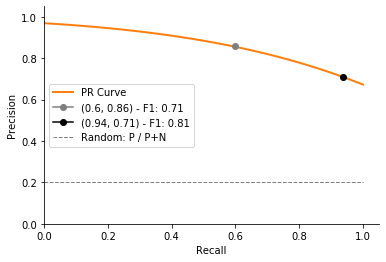

In [276]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = ['Arial']

op = lambda x: 1 - x**5

def f1_score(precision, recall):
    return 2*precision*recall / (precision+recall)

xs = np.linspace(0,1,50)
ys = op(np.linspace(0.5, 0.8, 50))

best_f1 = 0
best_x, best_y = 0,0
for x, y in zip(xs, ys):
    precision = y
    recall = x
    
    f1 = f1_score(precision, recall)
    if f1 > best_f1:
        best_f1 = f1
        best_x, best_y = x,y

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])

plt.plot(xs, ys, color="C1", label="PR Curve", lw=2)
# plt.fill_between(np.flip(x), sigm(x), alpha=0.3, color="C1", label="AUC")
plt.plot(0.6, 0.857, marker='o', color="C7", label=f"(0.6, 0.86) - F1: {round(f1_score(0.6,0.86),2)}")
plt.plot(best_x, best_y, marker='o', color="k", label=f"({round(best_x, 2)}, {round(best_y,2)}) - F1: {round(best_f1,2)}")
plt.plot([0, 1], [0.2, 0.2], lw=1, linestyle='--', label='Random: P / P+N', color="C7")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.savefig('../visuals/pr_curve.png', dpi=300)

[1.0, 0.9541180895073336, 0.9037232042121098, 0.8534536793280681, 0.7965400526513727, 0.7487777359909741, 0.6967531653503823, 0.6482386862228908, 0.5987213238059421, 0.5485771593330826, 0.49981195938322676, 0.4499185157327316, 0.3995236304375078, 0.3521373950106556, 0.3017425097154319, 0.24946721825247586, 0.199824495424345, 0.14880280807321047, 0.09953616647862605, 0.05352889557477748]


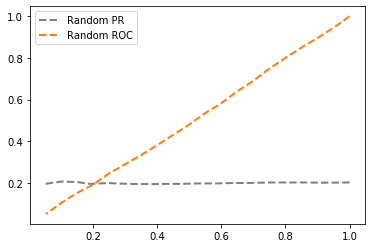

In [190]:
def weird_division(n, d):
    return n / d if d else 0


y_true = np.random.rand(10000) < 0.2
y_pred = np.random.rand(10000)

precs = []
recs = []
fprs = []

for threshold in np.linspace(0, 1, 20, endpoint=False):
    y_bin = y_pred >= threshold
    #print(y_bin)
    
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y_bin)):
        if y_bin[i] == y_true[i]:
            if y_true[i]:
                tp += 1
            else:
                tn += 1
        else:
            if y_true[i]:
                fn += 1
            else:
                fp += 1
                
    prec = weird_division(tp, (tp+fp))
    rec = weird_division(tp, (tp+fn))
    
    tpr = rec
    fpr = weird_division(fp, (fp+tn))
    
    precs.append(prec)
    recs.append(rec)
    fprs.append(fpr)

    
plt.plot(recs, precs, lw=2, linestyle='--', label='Random PR', color="C7")
plt.plot(fprs, recs, lw=2, linestyle='--', label='Random ROC', color="C1")
plt.legend()
print(fprs)

In [1]:
from pylab import *

cmap = cm.get_cmap('viridis', 30)    # PiYG

for i in range(10, 16):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

#2f6b8e
#2c738e
#297b8e
#25838e
#228c8d
#1f948c


In [3]:
import imgaug.augmenters as iaa
import numpy
numpy.random.bit_generator = numpy.random._bit_generator

clouds_aug = iaa.CloudLayer(intensity_mean=(220, 255),
            intensity_freq_exponent=(-2.0, -1.5),
            intensity_coarse_scale=2,
            alpha_min=(0.7, 0.9),
            alpha_multiplier=0.3,
            alpha_size_px_max=(2, 8),
            alpha_freq_exponent=(-4.0, -2.0),
            sparsity=0.9,
            density_multiplier=(0.4, 0.9))